# Dynamic Programming

Dynamic Programming (DP) refers to a collection of algorithims that can be used to compute optimal policies given a perfect model of the environment in markov decision processes (MDP). Classical DP algorithms aren't very useful due to their assumptions, like a perfect model, and their computational expense. But theoretically, they are foundational. 

The key to getting optimal policies is getting optimal value-functions. When can get these optimal value functions using DP. In chapter 3, we described optimal policies through the use of the bellman optimality equations:

$$
v_*(s)=\max_a\mathbb{E}[R_{t+1}+\gamma v_*(S_{t+1})|S_t=s,A_t=a]
$$

$$
=\max_a\sum_{s',r}p(s',r|s,a)[r+\gamma v_*(s')]
$$

$$
q(s,a)=\mathbb{E}[R_{t+1}+\gamma \max_{a'}q(s',a')|S_t=s,A_t=a]
$$

$$
=\sum_{s',r}p(s',r|s,a)[r+\gamma \max_{a'}q_*(s',a')]
$$


## Policy Evaluation (Prediction)
Evaluating the state-value function $v_{\pi}$ for an abitrary policy $\pi$ is known as policy evaluation, also known as the "prediction problem".

We know how to get the value-function for a state from an arbitrary policy using the state-value function from chapter 3:

$$
\sum_a\pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma v_{\pi}(s')] \text{\ (4.4)}
$$

If the environments dynamics are known then we would have $|\mathcal{S}|$ simultaneous linear equations of 4.4, one for each state. This calculation is tedious but doable. The book typically uses iterative solution methods for this. 

To start, we map the first, approximate value functions $v_0,v_1,v_2,...$ each to a real number. These numbers are chosen arbitrarily, except for terminal states, which need a value of 0. Then to update these approximations, we use the bellman equation for $v_{\pi}$ as the update rule:

$$
v_{k+1}(s)=\mathbb{E}_{\pi}[R_{t+1}+\gamma v_k(S_{t+1})|S_t=s]
$$

$$
=\sum_a\pi(a|s)\sum_{a',r}p(s',r|s,a)[r+\gamma v_k(s')]
$$

Remember, this is just the policy evaluation, not iteration, so we're not improving anything yet. $v_k=v_{\pi}$ here because the bellman equation $v_{\pi}$ ensures it by its definition. $v_k$ converges to $v_{\pi}$ as $k\rightarrow \infty$. This algoirthm is known as iterative policy evaluation.


There are other ways to update state-values, and this kind of operation is known as an *expected update*. The different kinds depend on whether a state or state-action pair are being updated, and depending on the precise way the estimated values of the successor states are combined. All updates done in dynamic programming are known as *expected* updates, because they are based on the expectation over all next possible states rather than a sample next state.

When we're writing sequential programs to implement iterative policy evaluation, we can do it either using one or two arrays. The two array variant has an array for the current $v_k(s)$ values and an array for the computed $v_{k+1}$ values. This allows us to compute the new values without altering the old ones.

But we can also do it with just one array, where we update the values in-place, with the new value immediately overwriting the old one. However the order in which we do these calculations affects the convergence to $v_{\pi}$. The in-place algorithm typically converges faster than the two array variant, because it uses the new data immedaitely.

We think of state-value updates to be done as a *sweep* through the state space. Also, we typically have the in-place version in mind in DP. 

The pseudocode for Iterative Polcy Evaluation looks like the following:

Input $\pi$, the policy being evaluated

Algorithm parameter: a small threshold $\theta>0$ determining accuracy of estimation

Initialise V(s), for all $s\in\mathcal{S}^+$, arbitrarily except for V(terminal)=0

Exercise 4.1

$q_{\pi}(s, a) = \sum_{s',r}p(s',r|s,a)[r+\gamma v_{\pi}(s')]$

No discounting, and actions are deterministic

$q_{\pi}(11, down) = 1 * (-1 + 0) = -1$ 

$q_{\pi}(7, down) = 1 * (-1 + -14) = -15$

Exercise 4.2

### Part 1

$v_{\pi}(s) = \sum_{a}\pi(a|s)\sum_{s', r}p(s',r|s,a)[r+\gamma v_{\pi}(s')]$

$v_{\pi}(15) = 0.25 * 1 * (-1 + -22) + 0.25 * 1 * (-1 + -20) + 0.25 * 1 * (-1 + -14) + 0.25 * 1 * (-1 * v_{\pi}(15))$

$ = 0.25 * -23 + 0.25 * -21 + 0.25 * -15 + 0.25 * (-1 + v(15))$

$ = -5.75 + -5.25 + -3.75 + 0.25 * (-1 + v(15))$

$ = -14.75 + 0.25 * (-1 + v_{\pi}(15))$

$ = -14.75 + -0.25 + 0.25v_{\pi}(15)$
$ = -15 + 0.25v_{\pi}(15) $

$ v_{\pi}(15) - 0.25v_{\pi}(15) = -15 $

$ (1 - 0.25)v_{\pi}(15) = -15 $

$ 0.75v_{\pi}(15) = -15 $

$ v_{\pi}(15) = \frac{-15}{0.75} = -20 $




### Part 2

$ v_{\pi}(15) = 1/4[(-1 + v_{\pi}(12)) + -1 + v_{\pi}(13) + -1 + v_{\pi}(14) + -1 + v_{\pi}(15)]$

$ v_{\pi}(13) = 1/4[-1 + v_{\pi}(12) + -1 + v_{\pi}(9) + -1 + v_{\pi}(14) + -1 + v_{\pi}(15)] $

### State 15

$ 4v_{\pi}(15) = (-1+v_{\pi(12)}) + (-1+v_{\pi}(13)) + (-1+v_{\pi}(14)) + (-1+v_{\pi}(15))$

$ 4v_{\pi}(15) = -4 + v_{\pi}(12) + v_{\pi}(13) + v_{\pi}(14) + v_{\pi}(15)$

$ 3v_{\pi}(15) = -4 + v_{\pi}(12) + v_{\pi}(13) + v_{\pi}(14)$

$ 3v_{\pi}(15) = -4 + -22 + v_{\pi}(13) + -14$

$ 3v_{\pi}(15) = -40 + v_{\pi}(13)$

### State 13

$ 4v_{\pi}(13) = -4 + v_{\pi}(12) + v_{\pi}(9) + v_{\pi}(14) + v_{\pi}(15)$

$ 4v_{\pi}(13) = -4 + -22 + -20 + -14 + v_{\pi}(15)$

$ 4v_{\pi}(13) = -60 + v_{\pi}(15)$

### Combine the two

Insert 13 into 15

$ 3v_{\pi}(15) = -40 + \frac{-60 + v_{\pi}(15)}{4}$

Multiply both sides by 4

$ 12v_{\pi}(15) = -160 + -60 + v_{\pi}(15)$

Combine terms

$ 12v_{\pi}(15) = -220 + v_{\pi}(15) $

$ 11v_{\pi}(15) = -220 $ 

$ v_{\pi}(15) = -20$ 

$ 4v_{\pi}(13) = -60 + -20$

$ 4v_{\pi}(13) = -80$

$ v_{\pi}(13) = -20$





Exercise 4.3 (4.3) Analogous 
$$
q_{\pi}(s,a)=\mathbb{E}_{\pi}[G_t | S_t=s, A_t=a]
$$
$$
q_{\pi}(s,a)=\mathbb{E}_{\pi}[R_{t+1}+\gamma G_{t+1}|S_t=s, A_t=a]
$$
$$
q_{\pi}(s,a)=\mathbb{E}_{\pi}[R_{t+1}+\gamma \sum_{s',a'} q(s',a') | S_t=s, A_t=a] \ \ Incorrect
$$
$$
q_{\pi}(s,a)=\mathbb{E}_{\pi}[R_{t+1}+\gamma q_{\pi}(S_{t+1},A_{t+1})|S_t=s, A_t=a]
$$
The role of the policy under the expectation here is it signifies the average q value assuming the policy.
$$
q_{\pi}(s,a)=\mathbb{E}[R_{t+1}+\gamma \mathbb{E}_{A'~\pi(\dot|S_{t+1})}[q_{\pi}(S_{t+1},A')]|S_t=s, A_t=a]
$$
Here we have the expanded version, it shows us more what the policy is doing, it's essentially getting the expected value of the subsequent action value given the expected action at the subsequent state.

Exercise 4.3 (4.4) Analogous
$$
q_{\pi}(s,a)=\sum_{s',r}p(s',r|s,a)[r+\gamma \sum_{a'}\pi(a'|s')q_{\pi}(s',a')]
$$

Exercise 4.3 (4.55) Analogous

$$
q_{k+1}(s,a)=\sum_{s',r}p(s',r|s,a)[r+\gamma \sum_{a'}\pi(a'|s')q_{k}(s',a')]
$$

Loop:
    ∆ <- 0

    Loop for each s in S:

        v <- V(s)

        V(s) <- sum_a\pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma V(s')]

        ∆ <- max(∆,v-V(s))
        
until ∆ < θ

## Implemented Iterative Policy Evaluation for Gridworld in Python

In [54]:
"""
A Basic implementation. Policy is hardcoded in get_state_values, as well as the reward. 
"""
import numpy as np

def get_state_value(state_index, state_values, discount_rate):
    state_value = 0
    actions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
    state_index_arr = np.array(state_index)
    for action in actions:
        subsequent_position = state_index_arr + action 
        i, j = subsequent_position
        if i < 0 or j < 0 or i > 3 or j > 3:
            state_value += 0.25 * (-1+ (discount_rate * state_values[*state_index]))
        else:
            state_value += 0.25 * (-1 + (discount_rate * state_values[i, j]))
    return state_value

def init_states():
    state_values = np.zeros((4, 4))
    return state_values

def iterative_policy_evaluation(state_values, theta, discount_rate=1):
    while True:
        delta = 0
        for i in range(4):
            for j in range(4):
                if i == 0 and j == 0:
                    continue 
                elif i == 3 and j == 3:
                    continue
                else:
                    v = state_values[i, j]
                    state_values[i,j] = get_state_value([i, j], state_values, discount_rate)
                    delta = max(delta, abs(v - state_values[i, j]))
        if delta < theta:
            break

    return state_values

state_values = init_states()
print(iterative_policy_evaluation(state_values, 1e-10, 1))


[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]


## Policy Improvement

We want to compute the value functions with respect to a policy to find better policies.
Suppose we have an arbitrary deterministic policy $\pi$. For some state *s*, we'd like to know whether we should change the policy such that action $a \neq \pi(s)$. We know how good the current policy is from policy evaluation which gave us the value state for s $v_{\pi}(s)$. But might changing the policy be better or worse? One method of answering this is selecting a in s and therafter, continue following the existing policy $\pi$. This can be denoted formally by:
$$
q_{\pi}(s,a) \doteq \mathbb{E}[R_{t+1}+\gamma v_{\pi}(S_{t+1}|S_t=s,A_t=a)]
$$
$$
=\sum_{s',r}p(s',r|s,a)[r+\gamma v_{\pi}(s')]
$$

What's key here is that if this action-value is greater than $v_{\pi}(s)$, then it would be better to select a when in s and then follow $\pi$ thereafter, then it would be to follow $\pi$ all the time. This leads us to realise that selecting a in s everytime would be a better, new policy. 

This being true is a special case of a general result known as the *policy improvement thereom*. Let $\pi$ and $\pi'$ be any pair of deterministic policies such that, for all $s\in\mathcal{S}$,
$$
q_{\pi}(s,\pi'(s))\geq v_{\pi}(s)
$$
This implies that the policy $\pi'$ is atleast as good or better than $\pi$. So for all $s\in\mathcal{S}$,
$$
v_{\pi'}(s)\geq v_{\pi}(s) \ (4.8)
$$
This also means that if there is a strict inequality (that is, one is greater than the other, not equal) of 4.7 at any state, there is also a strict inequality of 4.8 at that state. This applies to the earlier determinstic policies, $\pi$ and $\pi'$, where the two are identicaly except that $\pi'(s)=a\neq\pi(s)$. Because of 4.8, it also means that 4.7 will hold for all states other than s, as a value function has increased and no others have decreased, so 4.7 will hold true. 




So we can see how we can take a policy and it's corresponding value function, then evaluate a change to the policy at a single state and to a particular action. We can then extend it to consider all states and all possible actions. We do this by selecting the best action according to all action-values in that state. We're essnetially considering the new greedy policy $\pi'$ with respect to q:
$$
\pi'(s)\doteq\argmax_aq_{\pi}(s,a)
$$
$$
=\argmax_a\mathbb{E}[R_{t+1}+\gamma v{\pi}(S_{t+1})|S_t=s,A_t=a]
$$
$$
=\argmax_a\sum_{s',r}p(s',r|s,a)[r+\gamma v_{\pi}(s')]
$$


When we have ties, we break them arbitrarily (in deterministic policies). This greedy approach takes the action that looks best in the short term after a one step lookahead, with respect to $v_{\pi}$. By it's definition, this greedy policy will meet the conditions of the policy improvement thereom. So it's better or equal to the original policy. This process, of making new policies based on the evaluation of an original policy with respect to its value functions is known as *policy improvement*. 

If, after running policy improvement on a policy, we get no changes to the original policy, then we have found the optimal policy, and both $\pi$ and $\pi'$ will be optimal policies. This can be seen through the Bellman optimality equation, which is true for all states $s\in\mathcal{S}$
$$
v_{\pi'}=\max_a\mathbb{E}[R_{t+1}+\gamma v_{\pi'}(S_{t+1}|S_t=s,A_t=a)]
$$
$$
\max_a=sum_{s',r}p(s',r|s,a)[r+\gamma v_{\pi'}(s')]
$$


All of this was for determinstic policies, but it also applies to stochastic policies. With a subtle difference being that when there are ties, we don't need to pick one action, we can just split the likelihood between all actions with that maximum q value. We can also use any other weighting scheme, as long as non-optimal actions are given a probability of 0. 

## Policy Iteration

Once we have a policy $\pi$ and then evaluate it to get $v_{\pi}$, we can then use policy improvement to get a better policy $\pi'$. We can then compute $v_{\pi'}$ to get an even better policy $\pi''$ and so forth. 
$$
\pi_0 \rightarrow^E v_{\pi_0}\rightarrow^I\pi_1\rightarrow^Ev_{\pi_1}\rightarrow^I\pi_2\rightarrow^E...\rightarrow^I\pi_*\rightarrow^Ev_*,
$$

Where $\rightarrow^E$ and $\rightarrow^I$ represent policy *evaluation* and *improvement* respectively. Each policy is guarenteed to be an improvemet over the last, unless they're both the optimal policy. Because it's a finite MDP, there will be an optimal policy and optimal value function in a finite number of iterations. We call this process *process iteration*. An interesting thing to ntoe about policy iteration is that the policy evaluations are iterative, but the time taken to get the policy evaluation dramatically decreases with more evaluations, likely due to the difference in value states being similar.

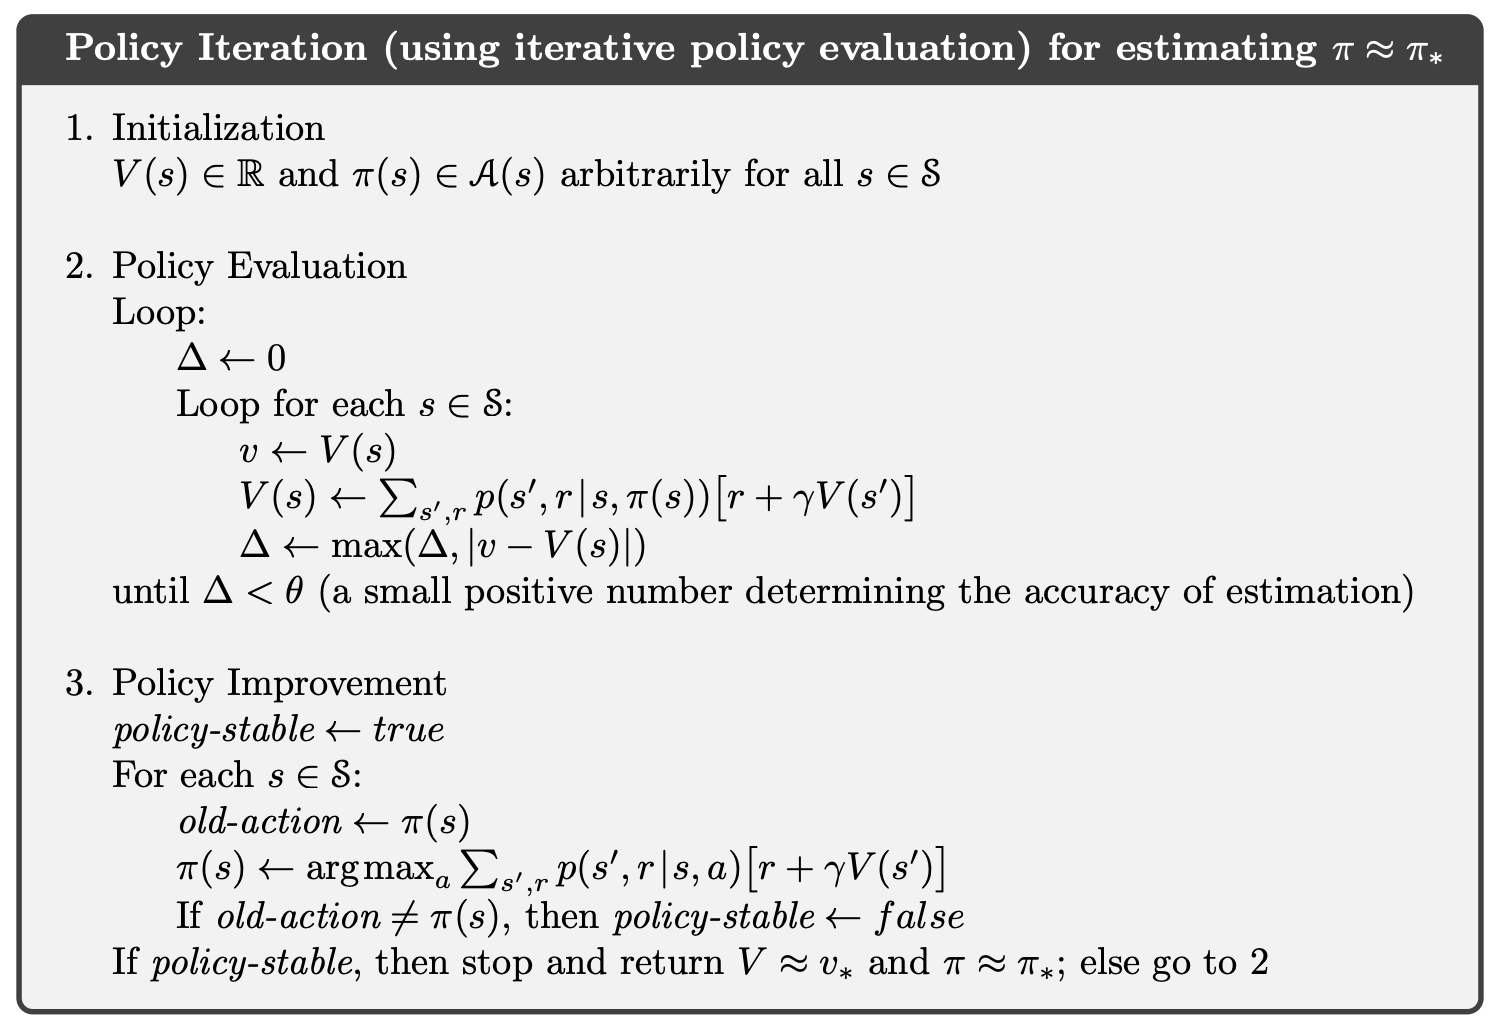

In [ ]:
"""
A Basic implementation. Policy is now a dictionary of all states with corresponding actions, reward is still hardcoded. 
"""
import numpy as np

ACTIONS = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]]) # Up, Down, Left, Right
DISCOUNT_RATE = 1
THETA = 1e-3

def init_equiprobable_policy():
    return {i: [0.25, 0.25, 0.25, 0.25] for i in range(15)}

def init_states():
    state_values = np.zeros((4, 4))
    return state_values

def get_state_value(state, policy, state_index, state_values):
    state_value = 0
    state_index_arr = np.array(state_index)
    for action_index, action in enumerate(ACTIONS):
        subsequent_position = state_index_arr + action 
        i, j = subsequent_position
        if i < 0 or j < 0 or i > 3 or j > 3:
            state_value += policy[state][action_index] * (-1 + (DISCOUNT_RATE * state_values[*state_index]))
        else:
            state_value += policy[state][action_index] * (-1 + (DISCOUNT_RATE * state_values[i, j]))
    return state_value

def get_action_values(state_index, state_values):
    state_index_arr = np.array(state_index)
    action_values = []
    for action in ACTIONS:
        subsequent_position = state_index_arr + action 
        i, j = subsequent_position
        if i < 0 or j < 0 or i > 3 or j > 3:
            action_values.append(-1 + (DISCOUNT_RATE * state_values[*state_index]))
        else:
            action_values.append(-1 + (DISCOUNT_RATE * state_values[i, j]))
    return action_values

def iterative_policy_evaluation(state_values, policy):
    while True:
        delta = 0
        state = 1
        for i in range(4):
            for j in range(4):
                if i == 0 and j == 0:
                    continue 
                elif i == 3 and j == 3:
                    continue
                else:
                    v = state_values[i, j]
                    state_values[i,j] = get_state_value(state, policy, [i, j], state_values)
                    delta = max(delta, abs(v - state_values[i, j]))
                    state += 1
        if delta < THETA:
            break
    return state_values

def argmax(x):
    x = np.array(x)
    max_val = np.max(x)
    mask = (x==max_val).astype(float)
    return (mask / mask.sum()).tolist()

def iterative_policy_improvement(policy, init_state_values):
    state_values = iterative_policy_evaluation(init_state_values, policy)
    while True:
        policy_stable = True
        state = 1
        for i in range(4):
            for j in range(4):
                if i == 0 and j == 0:
                    continue
                elif i == 3 and j ==3:
                    continue
                else:
                    old_action = policy[state].copy()
                    action_values = get_action_values([i, j], state_values)
                    policy[state] = argmax(action_values)
                    if old_action != policy[state]:
                        policy_stable = False
                    state += 1
        if policy_stable:
            break
        else:
            state_values = iterative_policy_evaluation(state_values, policy)
    return policy
        
state_values = init_states()
policy = init_equiprobable_policy()
print(iterative_policy_improvement(policy, state_values))


[[  0.         -13.99330608 -19.99037659 -21.98940765]
 [-13.99330608 -17.99178568 -19.99108113 -19.99118312]
 [-19.99037659 -19.99108113 -17.99247411 -13.99438108]
 [-21.98940765 -19.99118312 -13.99438108   0.        ]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
{0: [0.25, 0.25, 0.25, 0.25], 1: [0.0, 0.0, 1.0, 0.0], 2: [0.0, 0.0, 1.0, 0.0], 3: [0.0, 0.5, 0.5, 0.0], 4: [1.0, 0.0, 0.0, 0.0], 5: [0.5, 0.0, 0.5, 0.0], 6: [0.25, 0.25, 0.25, 0.25], 7: [0.0, 1.0, 0.0, 0.0], 8: [1.0, 0.0, 0.0, 0.0], 9: [0.25, 0.25, 0.25, 0.25], 10: [0.0, 0.5, 0.0, 0.5], 11: [0.0, 1.0, 0.0, 0.0], 12: [0.5, 0.0, 0.0, 0.5], 13: [0.0, 0.0, 0.0, 1.0], 14: [0.0, 0.0, 0.0, 1.0]}


Exercise 4.4

Here I thought comparing state values would do the job. But the answer is a subtle one. The algorithm implies that we'd arbitrarily pick the max q value if there's a tie, which could lead to different policies of the same optimal value, causing there to be non-convergence. A way to fix this is to make that step deterministic. This could be done by using a weighting function that weights the equal q values, or if it's deterministic, then we could always pick the first instance of the max q value.

## Exercise 4.5

In [133]:
"""
A Basic implementation. Policy is now a dictionary of all states with corresponding actions, reward is still hardcoded. 
"""
import numpy as np

ACTIONS = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]]) # Up, Down, Left, Right
DISCOUNT_RATE = 1
THETA = 1e-3
GRIDWORLD = np.array([['t', 1, 2, 3],
                     [4, 5, 6, 7],
                     [8, 9, 10, 11],
                     [12, 13, 14, 't']])
REWARD = -1

def init_equiprobable_policy():
    return {i: np.array([0.25, 0.25, 0.25, 0.25]) for i in range(1, 15)}

def init_action_values():
    return np.full((14, 4), 0) # The idea of using 2D arrays for Q values is from chatgpt - allows us to dot product rather than for loop

def update_action_values(state, policy, state_index, action_values):
    for action_index, action in enumerate(ACTIONS):
        subsequent_position = np.array(state_index) + action 
        i, j = subsequent_position
        if i < 0 or j < 0 or i > 3 or j > 3:
            state_prime = state
        else:
            state_prime = GRIDWORLD[i, j]
        if state_prime != 't':
            action_values[state-1][action_index] = REWARD + DISCOUNT_RATE * np.dot(policy[int(state_prime)], action_values[int(state_prime)-1])
        else:
            action_values[state-1][action_index] = REWARD
    return action_values[state-1]

def iterative_policy_evaluation(action_values, policy):
    old_action_values = action_values.copy() # Need to save old action values otherwise we get errors from using the same values when moving ends with us in the same state
    while True:
        delta = 0
        state = 1
        for i in range(4):
            for j in range(4):
                if i == 0 and j == 0:
                    continue 
                elif i == 3 and j == 3:
                    continue
                else:
                    v = old_action_values[state-1].copy()
                    action_values[state-1] = update_action_values(state, policy, [i, j], old_action_values)
                    delta = max(delta, np.max(np.abs(v-action_values[state-1])))
                    state += 1
        if delta < THETA:
            break

def argmax(x):
    max_val = np.max(x)
    mask = (x==max_val).astype(float)
    return mask / mask.sum()

def iterative_policy_improvement(policy, action_values):
    iterative_policy_evaluation(action_values, policy)
    while True:
        policy_stable = True
        state = 1
        for i in range(4):
            for j in range(4):
                if i == 0 and j == 0:
                    continue
                elif i == 3 and j == 3:
                    continue
                else:
                    old_action = policy[state].copy()
                    policy[state] = argmax(action_values[state-1])
                    if np.all(old_action != policy[state]):
                        policy_stable = False
                    state += 1
        if policy_stable:
            break
        else:
            iterative_policy_evaluation(action_values, policy)
    return policy
        
action_values = init_action_values()
policy = init_equiprobable_policy()
print(iterative_policy_improvement(policy, action_values))


{1: array([0., 0., 1., 0.]), 2: array([0., 0., 1., 0.]), 3: array([0. , 0.5, 0.5, 0. ]), 4: array([1., 0., 0., 0.]), 5: array([0.5, 0. , 0.5, 0. ]), 6: array([0.25, 0.25, 0.25, 0.25]), 7: array([0., 1., 0., 0.]), 8: array([1., 0., 0., 0.]), 9: array([0.25, 0.25, 0.25, 0.25]), 10: array([0. , 0.5, 0. , 0.5]), 11: array([0., 1., 0., 0.]), 12: array([0.5, 0. , 0. , 0.5]), 13: array([0., 0., 0., 1.]), 14: array([0., 0., 0., 1.])}


Exercise 4.6

This behaviour essentially makes each action have a likelihood of above 0. As the number of actions increases, the probability of each action will decrease, but won't be 0. So our argmaxing opperation would need to account for this, it would still ensure that the best actions would have the highest probabilities, but it wouldn't be 1. So argmax would instead be something like softmax but with the epsilon greedy implemented. One way of doing this is setting each action with an action value of 0 to be the minimum probability. 2 shouldn't really be changed. For 1, a potential change could be to ensure that all value states are intialised as the same number, which should help with convergence as at each value state calculation, each possible action would need to be accounted for.

## Exercise 4.7

In [ ]:
"""
Jack's Car Rental
"""
import numpy as np
import math

# Constants
ACTIONS = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
policy[5] = 1 # Set moving 0 cars as the policy initially
CAR_PRICE = 10
MOVING_PRICE = 2
DISCOUNT_RATE = 0.9
MAX_CARS = 20
POISSON_UPPER_BOUND = 13 # We use this because 99.99% of the distrubtion of values are within this limit. And 4 here is our highest expected value, so just going to use that.

state_values = np.zeros((21, 21), dtype=np.float32) # 0,0 - no cars at both locations, 20, 0 - 20 cars at first location 0 and second, 0, 20 - 20 cars at second location 0 at first, etc
policy = np.zeros((21, 21), dtype=np.float32)
pBackup = dict()

states = []
for i in range(21):
    for j in range(21):
        states.append([i, j])

def poisson(n, expectation):
    global pBackup # Call the global pBackup Dictionary
    key = n * 10 + expectation # Create key for easy access
    if key not in pBackup:
        pBackup[key] = np.exp(-expectation) * math.pow(expectation, n) / math.factorial(n)
    return pBackup[key]

def expected_return(state, action, state_values):
    returns = 0.0
    returns -= MOVING_PRICE * np.absolute(action)

    # Cars at the start of the day
    cars_location_1 = int(min(state[0]-action, MAX_CARS))
    cars_location_2 = int(min(state[1]+action, MAX_CARS))

    # For possible rental values for both locations
    for rentals_location_1 in range(POISSON_UPPER_BOUND):
        for rentals_location_2 in range(POISSON_UPPER_BOUND):

            # Get probability of getting both rental amounts
            # i.e., probability of getting rental amount one multiplied by the probability of getting rental amount two
            rental_probability = poisson(rentals_location_1, 3) * poisson(rentals_location_2, 4)

            # Cap out rentals by the number of cars the location had previously
            # You can't rent out more cars than you have
            total_rentals_location_1 = min(cars_location_1, rentals_location_1)
            total_rentals_location_2 = min(cars_location_2, rentals_location_2)

            # Reward for this permutation
            rewards = (total_rentals_location_1 + total_rentals_location_2) * CAR_PRICE

            # Now we take into account the returns
            for returns_location_1 in range(POISSON_UPPER_BOUND):
                for returns_location_2 in range(POISSON_UPPER_BOUND):

                    # Get probability of getting both return amounts
                    return_probability = poisson(returns_location_1, 3) * poisson(returns_location_2, 2) * rental_probability

                    # How many cars are we left with given the amount of cars rented and returned, and also we max out at 20 cars
                    cars_location_one_prime = min(cars_location_1 - total_rentals_location_1 + returns_location_1, MAX_CARS)
                    cars_location_two_prime = min(cars_location_2 - total_rentals_location_2 + returns_location_2, MAX_CARS)

                    # Add the return weighted by its probability
                    returns += return_probability * (rewards + DISCOUNT_RATE * state_values[cars_location_one_prime, cars_location_two_prime])
    return returns

def policy_evaluation(state_values, policy):
    iteration = 1
    while True:
        new_state_values = np.zeros((21, 21), dtype=np.float32)
        for i, j in states:
            new_state_values[i, j] = expected_return([i, j], policy[i, j], state_values)

        diff = np.sum(np.absolute(new_state_values - state_values))
        state_values = new_state_values.copy()
        if diff < 1e-4:
            break
        print(f"Completed policy evaluation iteration: {iteration}")
        print(f"Difference: {diff}")
        iteration += 1
    return state_values

def policy_improvement(state_values, policy):
    new_policy = np.zeros((21, 21))
    improve_policy = True
    for i, j in states:
        action_returns = []
        for action in ACTIONS:
            if ((action >= 0 and i >= action) or (action < 0 and j >= np.absolute(action))):
                action_returns.append(expected_return([i, j], action, state_values))
            else:
                action_returns.append(-float('inf'))
        best_action = np.argmax(action_returns)
        new_policy[i, j] = ACTIONS[best_action]
    policyChanges = np.sum(new_policy != policy)
    if policyChanges == 0:
        improve_policy = False
    policy = new_policy
    print(f"Completed policy evaluation evaluation, policy improvement: {improve_policy}")
    return policy, improve_policy


def policy_iteration(state_values, policy):
    while True:
        # Policy Evaluation
        state_values = policy_evaluation(state_values, policy)
            
        # Policy improvement
        policy, improve_policy = policy_improvement(state_values, policy)
        if not improve_policy:
            break

    return policy


print(policy_iteration(state_values, policy))


Completed policy evaluation iteration: 1
Difference: 26759.8984375
Completed policy evaluation iteration: 2
Difference: 24038.1953125
Completed policy evaluation iteration: 3
Difference: 21037.294921875
Completed policy evaluation iteration: 4
Difference: 18356.05859375
Completed policy evaluation iteration: 5
Difference: 16010.580078125
Completed policy evaluation iteration: 6
Difference: 13989.068359375
Completed policy evaluation iteration: 7
Difference: 12265.5546875
Completed policy evaluation iteration: 8
Difference: 10802.236328125
Completed policy evaluation iteration: 9
Difference: 9556.982421875
Completed policy evaluation iteration: 10
Difference: 8490.197265625
Completed policy evaluation iteration: 11
Difference: 7568.34130859375
Completed policy evaluation iteration: 12
Difference: 6764.66748046875
Completed policy evaluation iteration: 13
Difference: 6058.4873046875
Completed policy evaluation iteration: 14
Difference: 5433.9541015625
Completed policy evaluation iteratio

KeyboardInterrupt: 

## Value Iteration

A critical drawback to policy iteration is that it requires policy evaluation, which in itself may take a long time depending on the number of states, transitions, etc. If regular policy evaluation is done iteratively, then converegence to $v_{\pi}$ only happens at the limit and this could take many iterations. So this raises the question, can we truncate policy evaluation? In Jack's car rental example, policy evaluation beyond the first three iterations have no effect on the corresponding greedy policy with respect to $\pi$. 

We can truncate policy iteration in several ways without losing the convergence guarantees of policy iteration. One way we can do this is by simply stopping policy evaluation after one sweep. This algorithm is known as *value iteration*. It can be written as the following:

$$
v_{k+1}(s)\doteq \max_a \mathbb{E}[R_{t+1}+\gamma v_k(S_{t+1})|S_t=s,A_t=a]
$$
$$
=\max_a\sum_{s',r}p(s',r|s,a)[r+\gamma v_k(s')]
$$

This is of course done for all $s\in\mathcal{S}$. We terminate when the change in value functions is only tiny over a sweep. The entire algorithm can be seen from:

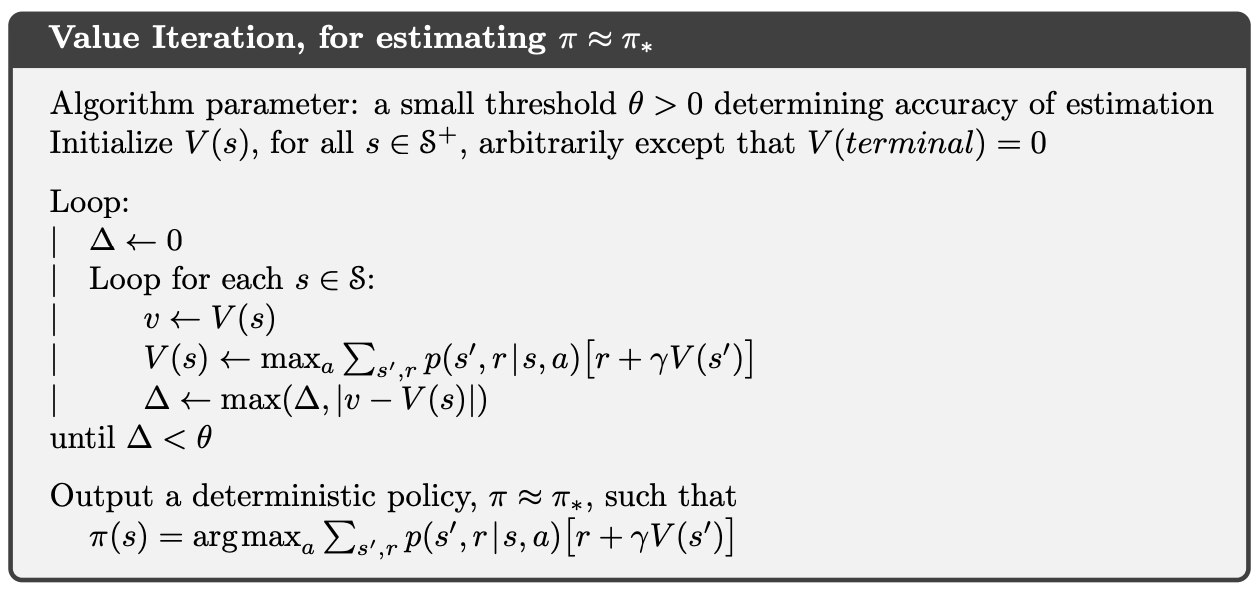

Value iteration effectively combines policy improvement and evaluation into a one sweep algorithm (although this is done many times until convergence).

Exercise 4.8

If we're at 50 and bet 50, then the two possible subsequent states either end up with us losing or winning. If we're at 51 and bet say, 49, then we either win or end up in a much poorer state than before, being 1. That being said, we end up in a much worse state in the first scenario. TBH not entirely sure, chatgpt it's because of the discretisation of the problem. 

{0: 0, 1: 7.286116828229273e-05, 2: 0.00029144467312949135, 3: 0.0006952645710426708, 4: 0.0011657786925189269, 5: 0.0017712550607285997, 6: 0.0027810582841706834, 7: 0.004036612107070441, 8: 0.0046631147700757075, 9: 0.005601416444001523, 10: 0.007085020242914719, 11: 0.009040887701342202, 12: 0.011124233136683695, 13: 0.01567964587621164, 14: 0.016146448428281765, 15: 0.016953441295546448, 16: 0.01865245908030283, 17: 0.019826062333001063, 18: 0.02240566577600641, 19: 0.02738473440715873, 20: 0.02834008097165984, 21: 0.030494546749750717, 22: 0.03616355080536881, 23: 0.03849591006231304, 24: 0.04449693254673478, 25: 0.0625, 26: 0.06271858350484688, 27: 0.06337433401938847, 28: 0.06458579371312802, 29: 0.06599733607755678, 30: 0.06781376518218579, 31: 0.07084317485251206, 32: 0.07460983632121132, 33: 0.07648934431022712, 34: 0.07930424933200457, 35: 0.08375506072874417, 36: 0.08962266310402661, 37: 0.09587269941005108, 38: 0.10953893762863492, 39: 0.1109393452848453, 40: 0.11336032388

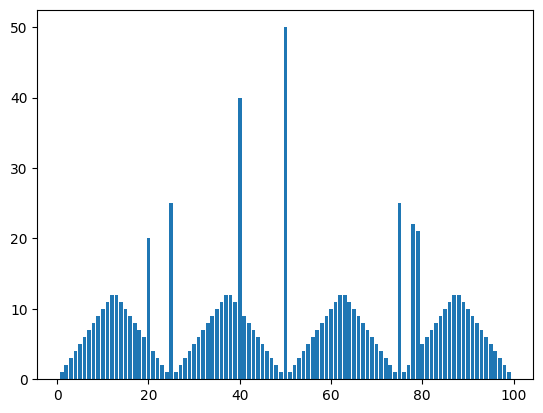

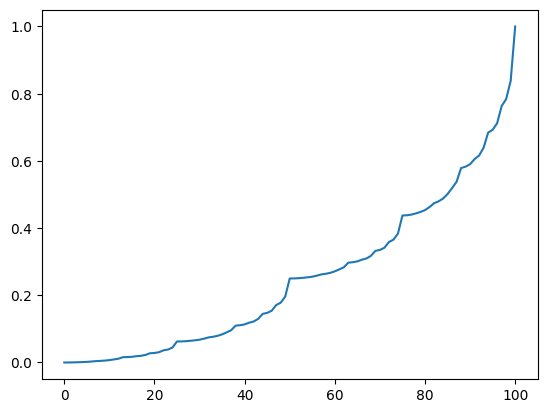

In [379]:
# Exercise 4.9
import numpy as np
import matplotlib.pyplot as mlt

state_values = {i: 0 for i in range(101)}
state_values[100] = 1
THETA = 1e-14
DISCOUNT_RATE = 1

p_head = 0.25

def get_q_values(state, state_values):
    if state <= 50:
        q_values = [0 for _ in range(state+1)]
    else:
        q_values = [0 for _ in range((100-state)+1)]

    for action in range(len(q_values)): # Possibel actions are 0 to 100-s
        # Bet is successful
        q_values[action] += p_head * (DISCOUNT_RATE * state_values[state+action])

        # Bet is not successful
        q_values[action] += (1 - p_head) * (DISCOUNT_RATE * state_values[state-action])

    return q_values

def value_iteration(state_values):
    while True:
        delta = 0
        old_state_values = state_values.copy()
        for state in list(state_values.keys())[1:-1]:
            old_value = state_values[state]
            state_values[state] = max(get_q_values(state, old_state_values))
            delta = max(delta, abs(old_value - state_values[state]))
        if delta < THETA:
            break
    return state_values

def get_policy(state_values):
    policy = {}
    for s in range(1, 100):
        actions = np.arange(1, min(s, 100 - s) + 1)
        qs = np.array([p_head*state_values[s+a] + (1-p_head)*state_values[s-a] for a in actions])
        policy[s] = actions[np.argmax(qs)]
    return policy

state_values = value_iteration(state_values)
print(state_values)
policy = get_policy(state_values)
print(policy.values())


mlt.bar(range(1, 100), policy.values())
mlt.show()
mlt.plot(state_values.values())
mlt.show()

It appears that as the probability of heads increases, the state values increase, this increase is especially noticable as the state approaches 0. For example at p_head = 0.4, it's a stead increase, kind of linear, but at p_head = 0.55, it's a sharp increase from 0, it looks quadratic. On the other hand, decreasing the probability decreases this increase, but it still ends up at 1 at stte 100, but obviously this is hard coded.

As for theta, the results aren't super stable. They do look stable from the POV of the state values, but the policy changes drastically, suggesting that it might have something to do with the choice of argmax tie breakers. 


Exercise 4.10

Equation 4.10
$$
v_{k+1}(s)\doteq \max_a \sum_{s',r}p(s',r|s,a)[r+\gamma v_k(s')]
$$


$$
q_{k+1}(s,a) \doteq  \sum_{s', r}p(s',r|s,a) [r + \gamma \max_{a'} q_k(s',a')]
$$

## Asynchronous MDPs

A major problem with the DP algorithims used so far is that they require us to go through the entire state set of an MDP. If the state set is extremely large, which is quite common, then even one sweep through the states would be too expensive. For example backgammon has $10^{20}$ states and chess has an estimated $10^{44}$ states. So even at trillions of operations per second, it would still take years for a single sweep. 

*Asynchronous* DP algorithims are in-place iterative DP methods that aren't organised such that they require systemic sweeps of the state set. They can update states in whatever order and use whatever values are currently available. For example, some states could be updated multiple times before another state is updated once. However to converge properly, the algorithm must continue to update all states, it can't ignore states, but the algorithms have great flexibility on selecting states to update.

## Generalised Policy Iteration

*Generalised Policy Iteration* (GPU) refers to the general idea of letting policy-evaluation and policy-improvement processes interact, independant of the granularity and other details of the two processes. Almost all reinforcement learning processes can be described as a GPI. Policy improvement and evaluation processes can be seen as competing and cooperating forces. They compete as they 'pull' in opposite directions, as policy improvement changing the value functions makes it incorrect to it's respective policy, then doing policy evaluation will change the value functions such that the policy is no longer greedy. But in the long run these two processes interact to find a single joint solution, the optimal policy and value functions. 

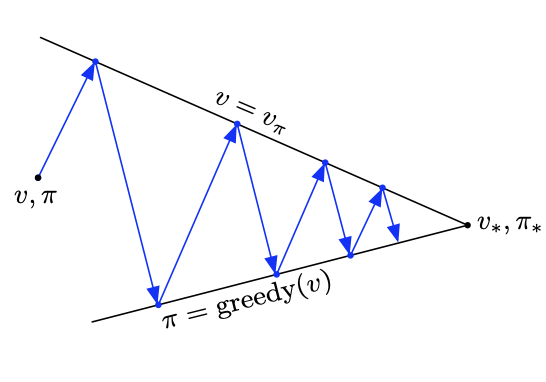

## Efficiency of Dynamic Programming

DP, while seemingly inefficient, is actually very efficient when compared to other methods, like search. Barring some nieche examples, DP algorithms typically find optimal solutions to MDPs in polynomial time in the worst case. If n and k denote the number of states and actions, then the computational operations will be less than some polynomial functions with n and k.
